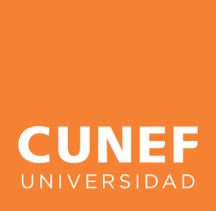

Realizado por:

***Sergio Ranz Casado***  
***Marcos Medina Cogolludo***

---

# 1.2. ANALISIS EDA HOSPITALIZACIÓN 

Realizamos un análisis post-accidente. En concreto, el análisis de las hospitalizaciones con respecto a las diferentes variables de nuestro data-set. Como conocer la hospitalización es uno de los objetivos de nuestro modelo, queremos ver cómo y en que medida esta relaccionada esta variable con el resto de las condiciones que podemos tener en un accidente de tráfico, en este sentido, queremos mostrar las siguientes cuestiones: 

1. *¿Hay diferencia entre la necesidad de tratamiento medico en hombres y mujeres despues de sufrir un accidente?*
2. *¿Hay diferencia entre la necesidad de tratamiento medico entre diferentes grupos de edad?*
3. *¿Hay diferencia entre el año del coche y el tratamiento medico necesitado?*
4. *¿Hay diferencia entre el tipo de coche y el tratamiento medico necesitado?*
5. *¿Hay diferencia entre la posición del habitáculo y el tratamiento medico necesitado?*
6. *Relacción temporal con numero de hospitalizados.*

---

#### IMPORTACIÓN DE LIBRERIAS

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import pyarrow.csv as pv
import pyarrow.parquet as pq
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

#### LECTURA DEL DATASET

In [3]:
df_acc = pd.read_parquet('../data/NCDB_1999_to_2014.parquet')
df_acc.columns = df_acc.columns.map(lambda x: x[:].lower())
df_acc

,c_year,c_mnth,c_wday,c_hour,c_sev,c_vehs,c_conf,c_rcfg,c_wthr,c_rsur,...,v_id,v_type,v_year,p_id,p_sex,p_age,p_psn,p_isev,p_safe,p_user
0,1999,01,1,20,2,02,34,UU,1,5,...,01,06,1990,01,M,41,11,1,UU,1
1,1999,01,1,20,2,02,34,UU,1,5,...,02,01,1987,01,M,19,11,1,UU,1
2,1999,01,1,20,2,02,34,UU,1,5,...,02,01,1987,02,F,20,13,2,02,2
3,1999,01,1,08,2,01,01,UU,5,3,...,01,01,1986,01,M,46,11,1,UU,1
4,1999,01,1,08,2,01,01,UU,5,3,...,99,NN,NNNN,01,M,05,99,2,UU,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860400,2014,UU,U,UU,2,UU,UU,01,U,U,...,13,07,UUUU,01,M,24,11,1,NN,1
5860401,2014,UU,U,23,2,01,06,05,1,1,...,01,14,2006,01,M,29,96,2,09,5
5860402,2014,UU,U,14,2,01,02,01,1,5,...,01,01,2006,01,F,UU,11,2,01,1
5860403,2014,UU,U,22,1,01,06,01,2,4,...,01,22,UUUU,01,M,67,12,3,01,U


#### 0.1.1. PEQUEÑO TRATAMIENTO DE DATOS PARA ANALIZAR...

Como ya hemos visto en nuestro análisis, tanto el mes como el dia de la semana tienen muy pocos valores NA. Por lo que hemos decidido eliminarlos. Para nuestro analisis exploratorio inicial.

In [4]:
df_acc_p = df_acc[:]
df_acc_p[['c_mnth','c_wday']] = df_acc_p[['c_mnth','c_wday']].replace('[^0-9]+',np.nan,regex=True)
df_acc_p.dropna(axis=0,subset=['c_mnth','c_wday'],inplace=True)

df_acc_p

,c_year,c_mnth,c_wday,c_hour,c_sev,c_vehs,c_conf,c_rcfg,c_wthr,c_rsur,...,v_id,v_type,v_year,p_id,p_sex,p_age,p_psn,p_isev,p_safe,p_user
0,1999,01,1,20,2,02,34,UU,1,5,...,01,06,1990,01,M,41,11,1,UU,1
1,1999,01,1,20,2,02,34,UU,1,5,...,02,01,1987,01,M,19,11,1,UU,1
2,1999,01,1,20,2,02,34,UU,1,5,...,02,01,1987,02,F,20,13,2,02,2
3,1999,01,1,08,2,01,01,UU,5,3,...,01,01,1986,01,M,46,11,1,UU,1
4,1999,01,1,08,2,01,01,UU,5,3,...,99,NN,NNNN,01,M,05,99,2,UU,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860376,2014,12,7,14,2,02,41,01,1,5,...,02,05,2008,01,M,44,11,1,02,1
5860377,2014,12,7,14,2,02,41,01,1,5,...,02,05,2008,02,M,34,13,2,02,2
5860378,2014,12,7,19,2,01,03,01,1,3,...,01,01,2001,01,F,35,11,2,02,1
5860379,2014,12,7,19,2,01,03,01,1,3,...,01,01,2001,02,M,26,13,1,02,2


In [5]:
df_acc_p["mortal"] = np.where(df_acc_p["c_sev"]==1,1,0)
df_acc_p["no mortal"] = np.where(df_acc_p["c_sev"]==2,1,0)
df_acc_p["Fecha"] = pd.to_datetime(df_acc_p['c_year'].map(str) + '-' + df_acc_p['c_mnth'], format='%Y-%m')


#### 1. Sexo vs tratamiento medico. 

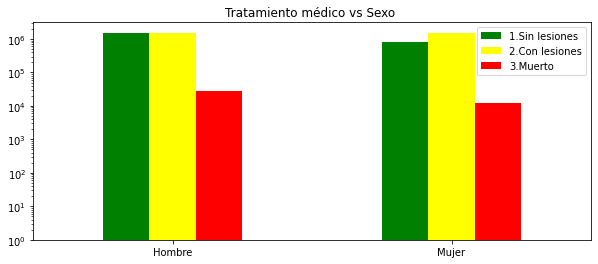

In [6]:
data_1= df_acc_p[['p_sex','p_isev']]
data_1.p_sex.replace({'M':0,'F':1},inplace=True)
data_1.replace('[^0-9]+',np.nan,regex=True,inplace=True)
data_1.dropna(inplace=True)
data_1 = data_1.groupby(["p_sex", "p_isev"]).size().unstack().set_axis(["Hombre", "Mujer"])

'''Dibujamos el grafico'''

fig,ax1 = plt.subplots()
ax1.tick_params(grid_alpha=0)

data_1.plot(kind="bar", log=True, rot=0, color=["green", "yellow", "red"], figsize=(10,4),
             title='Tratamiento médico vs Sexo ', ax=ax1)

plt.legend(['1.Sin lesiones','2.Con lesiones','3.Muerto'])

Hay una igualdad entre los hombres y las mujeres, por lo que no afecta en tener un accidente y un posterior tratamiento médico si es necesario el sexo de la persona.

#### 2. Edad vs Tratamiento medico.

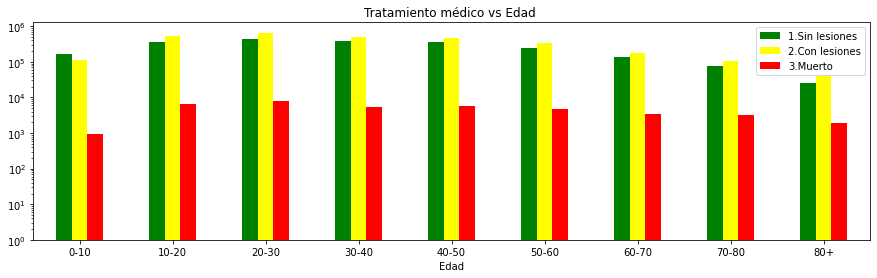

In [7]:
corte_edad= list(range(0,100,10))
data_2 = df_acc_p[['p_age',"p_isev"]].replace('[^0-9]+',np.nan,regex=True)
data_2.dropna(axis=0,subset=['p_age',"p_isev"],inplace=True)
data_2 = data_2.astype(int)
data_2["p_age"] = pd.cut(data_2["p_age"],corte_edad)
data_2 = data_2.groupby(['p_age','p_isev']).size().unstack()
data_2 = data_2.set_axis(["0-10", "10-20", "20-30",
            "30-40", "40-50", "50-60", 
            "60-70", "70-80", "80+"])

'''Dibujamos el grafico'''

fig,ax1 = plt.subplots()
ax1.tick_params(grid_alpha=0)

data_2.plot(kind="bar", rot=0, log=True, color=["green", "yellow", "red"], figsize=(15,4),title='Tratamiento médico vs Edad ', ax=ax1)
ax1.set_xlabel('Edad')
ax1.legend(['1.Sin lesiones','2.Con lesiones','3.Muerto'])

En cuanto al tratamiento médico y la edad, hay un mayor número de accidentes entre el rango de los 10-20 años, hasta los 60-70. Esto se debe en parte a la edad legal para conducir, que comienza con 18 años, edad en la que se es más inexperto y pueden tener más accidentes hasta los 70 u 80 años que es cuando empiezan a tener problemas ya sea de visión, reflejos o cualquier otro problema de salud por la edad lógicamente. También hay una pequeña disminución porque en esas edades disminuye el número de conductores aunque los accidentes suelen ser más aparatosos y graves.

#### 3. Edad de vehiculo vs tratamiento medico recibido

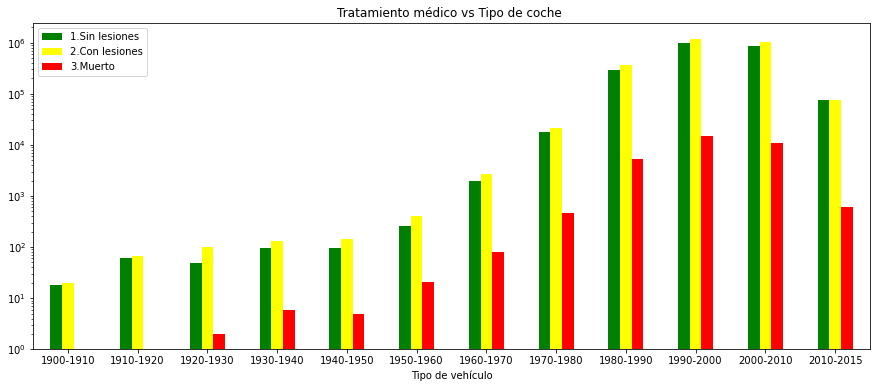

In [8]:
decadas=list(range(1900,2021,10))
data_3 = df_acc_p[["v_year", "p_isev"]]
data_3 = data_3[["v_year", "p_isev"]].replace('[^0-9]+', np.nan, regex=True)
data_3.dropna(axis=0, subset=['v_year', 'p_isev'], inplace=True)
data_3 = data_3.astype(int)
data_3["v_year"] = pd.cut(data_3["v_year"], decadas)
data_3 = data_3.groupby(['v_year', 'p_isev']).size().unstack()
data_3 = data_3.set_axis(["1900-1910","1910-1920","1920-1930","1930-1940","1940-1950","1950-1960","1960-1970",
                            "1970-1980","1980-1990","1990-2000","2000-2010","2010-2015"])

fig,ax1 = plt.subplots()
ax1.tick_params(grid_alpha=0)

data_3.plot(kind="bar",log=True,rot=0, color=["green", "yellow", "red"], figsize=(15,6),title='Tratamiento médico vs Tipo de coche ',ax=ax1)

ax1.set_xlabel('Tipo de vehículo')
ax1.legend(['1.Sin lesiones','2.Con lesiones','3.Muerto'])

Si realizamos la comparación entre el tratamiendo médico y el tipo de vehículo, vemos como en las primeras décadas y hasta pasada la segunda mitad del siglo XX, no hay una gran cantidad de muertes. Comienza a aumentar a partir de los años 60 porque hay un mayor número de coches en circulación, contado con los coches del período comprendido entre 1990 y 2010 como los que más lesiones y muertes se producen. Esto se debe a que todavía había coches que no contaban con los sistemas de seguridad adecuados como el cinturón y los airbag, además de que los motores de los vehículos comenzaron a ser más potentes y con más cilindrada. Se ve una reversión en los últimos 5 años de los que tenemos datos, en los que se comienza a igualar las lesiones con los que no tienen gracias a una mejora gradual en los sistemas de seguridad de los coches, que entre otros casos reduce las muertes en accidentes.

#### 4. Tipo de vehiculo vs tratamiento medico recibido

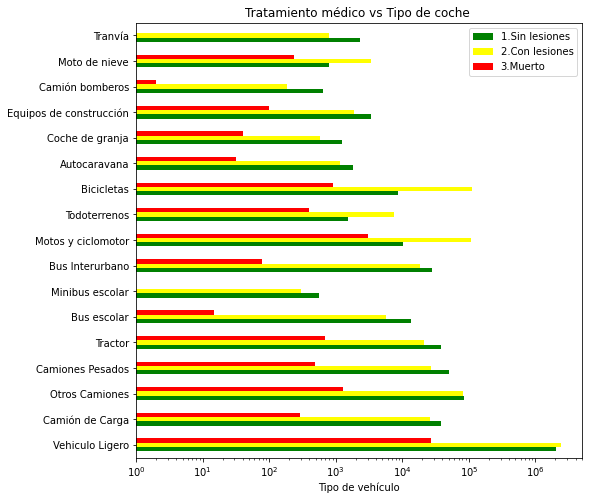

In [9]:
data_4 = df_acc_p[["v_type", "p_isev"]]
data_4 = df_acc_p[['v_type',"p_isev"]].replace('[^0-9]+',np.nan,regex=True)
data_4.dropna(axis=0,subset=['v_type',"p_isev"],inplace=True)
data_4 = data_4.groupby(['v_type','p_isev']).size().unstack()
data_4 = data_4.set_axis(["Vehiculo Ligero", "Camión de Carga", "Otros Camiones", "Camiones Pesados", "Tractor", "Bus escolar", 
                          "Minibus escolar", "Bus Interurbano", "Motos y ciclomotor", "Todoterrenos", "Bicicletas", "Autocaravana",
                         "Coche de granja", "Equipos de construcción", "Camión bomberos", "Moto de nieve", "Tranvía"])

'''Dibujamos el grafico'''

fig,ax1 = plt.subplots()
ax1.tick_params(grid_alpha=0)

data_4.plot(kind="barh",log=True, color=["green", "yellow", "red"], figsize=(8,8),title='Tratamiento médico vs Tipo de coche ',ax=ax1)

ax1.set_xlabel('Tipo de vehículo')
ax1.legend(['1.Sin lesiones','2.Con lesiones','3.Muerto'])

Para los tipos de vehículo respecto al tratamiento médico recibido, podemos ver un alto número de datos para las 3 variables en vehículos ligeros, ya que son el tipo de vehículo que más hay y por lo tanto con el que más accidentes se producen. Llama la atención la alta tasa de lesiones y muertes a aquellos conductores que utilizan la moto o la bicicleta, ya que un accidente en estos vehículos es mucho mayor su mortalidad que en un coche y va a haber más probabilidad de que se produzcan lesiones ya que al final la carrocería del vehículo es la propia persona. Una moto de nieve también se podría incluir en este argumento, ya que una caída en moto de nieve provoca más lesiones debido a la velocidad, el impacto con la nieve y la falta de protección. 


#### 5. Posición del habitaculo vs tratamiento medico recibido.

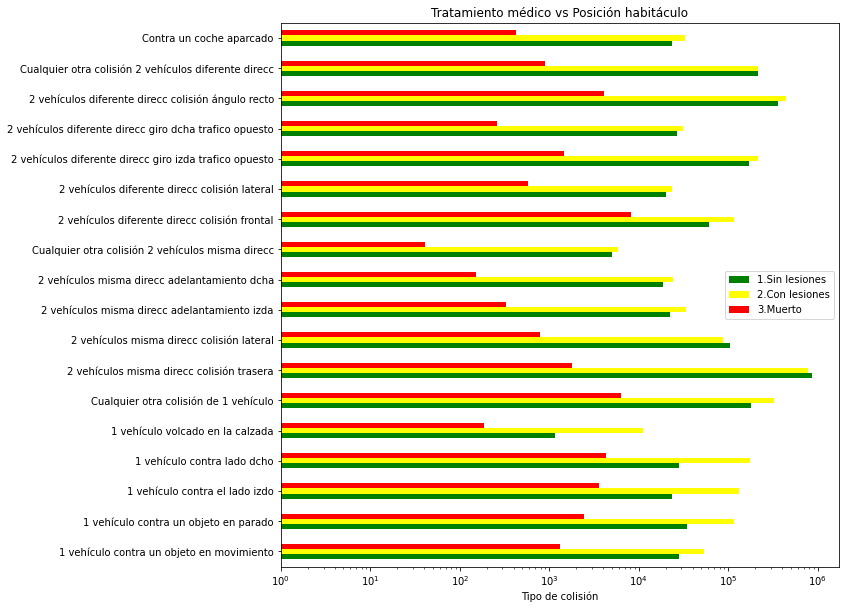

In [10]:
data_5 = df_acc_p[["c_conf", "p_isev"]]
data_5 = data_5[["c_conf", "p_isev"]].replace('[^0-9]+', np.nan, regex=True)
data_5.dropna(axis=0, subset=["c_conf", "p_isev"], inplace=True)
data_5 = data_5.groupby(["c_conf", "p_isev"]).size().unstack()

data_5= data_5.set_axis(["1 vehículo contra un objeto en movimiento","1 vehículo contra un objeto en parado", "1 vehículo contra el lado izdo",
                            "1 vehículo contra lado dcho", "1 vehículo volcado en la calzada", "Cualquier otra colisión de 1 vehículo", 
                            "2 vehículos misma direcc colisión trasera", "2 vehículos misma direcc colisión lateral", "2 vehículos misma direcc adelantamiento izda",
                            "2 vehículos misma direcc adelantamiento dcha", "Cualquier otra colisión 2 vehículos misma direcc",
                           "2 vehículos diferente direcc colisión frontal","2 vehículos diferente direcc colisión lateral",
                           "2 vehículos diferente direcc giro izda trafico opuesto","2 vehículos diferente direcc giro dcha trafico opuesto",
                           "2 vehículos diferente direcc colisión ángulo recto", "Cualquier otra colisión 2 vehículos diferente direcc",
                           "Contra un coche aparcado"])
'''Dibujamos el grafico'''

fig,ax1 = plt.subplots()
ax1.tick_params(grid_alpha=0)

data_5.plot(kind="barh",log=True, color=["green", "yellow", "red"], figsize=(10,10),title='Tratamiento médico vs Posición habitáculo',ax=ax1)

ax1.set_xlabel('Tipo de colisión')
ax1.legend(['1.Sin lesiones','2.Con lesiones','3.Muerto'])

Aqui vemos como el mayor numero de hospitalizados proviene de colisiones por alcance. Sin embargo, la mayor mortalidad proviene de colisiones frontales. Las hospitalizaciones de colisión en angulo recto de dos vehiculos tambien son importantes. 

#### 6. Relacción temporal con número de hospitalizados. 

<AxesSubplot:title={'center':'Tratamiento médico vs Años'}, xlabel='Fecha'>

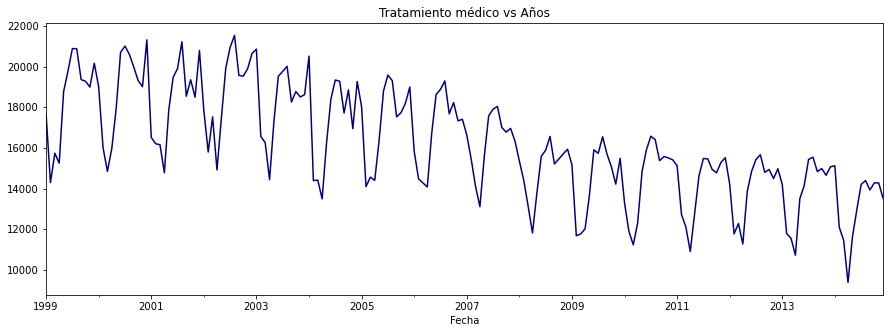

In [11]:
data_6= df_acc_p[["Fecha", "p_isev"]]
data_6 = data_6[["Fecha", "p_isev"]].replace('[^0-9]+',np.nan, regex=True)
data_6.dropna(axis=0, subset=['Fecha', 'p_isev'], inplace=True)
data_6 = data_6.set_index("Fecha").groupby(["Fecha", "p_isev"]).size().unstack()
data_6.drop('1', axis=1, inplace=True)
data_6["Total"] = data_6["2"] + data_6["3"]

'''Dibujamos el grafico'''

fig,ax1 = plt.subplots()
ax1.tick_params(grid_alpha=0)

data_6["Total"].plot(color="navy", figsize=(15,5),title='Tratamiento médico vs Años',ax=ax1)


Podemos ver como las hospitalizaciones y las muertes tienen exactamente la misma distirbución a lo largo del tiempo que los accidentes de trafico en canada que analizamos en el Analisis EDA de los accidentes. Lo que es logico, a menor numero de accidentes, menos hospitalizados. 

---